## Информация о входных данных

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

In [1]:
# Imports, downloads, and settings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns

stud = pd.read_csv('stud_math.csv')

In [2]:
display(stud.head(3))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

 school, sex, age are columns without gaps

# Functions

In [3]:
def show_info_object_col(column, df=stud):
    """Displays information about the object (non-numeric) column of the DataFrame

    :param column: The name of the column about which to display information  
    :type column: str
    :param df: Working DataFrame, contains the column of interest (default=stud)
    :type df: pandas.core.frame.DataFrame
    :param return: Only displays information
    :type return: None

    """
    n = 10
    display(pd.DataFrame(df[column].value_counts()))
    print(f'Values that occur more than {n} times in the column:',
          (df[column].value_counts() > n).sum())
    df.loc[:, [column]].info()


def get_boxplot(column, df=stud):
    """Builds boxplots for the column and 'score' (it's the main parameter)

    :param column: The name of the column about which to build boxplots  
    :type column: str
    :param df: Working DataFrame, contains the column of interest (default=stud)
    :type df: pandas.core.frame.DataFrame
    :param return: Only shows a boxplot graph
    :type return: None

    """
    fig, ax = plt.subplots(figsize=(14, 4))

    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)

    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column, df=stud, main_column='score'):
    """Searches for statistically significant differences between score and oject column

    :param column: The name of the oject column for find   
    :type column: str
    :param df: Working DataFrame, contains the column of interest (default=stud)
    :type df: pandas.core.frame.DataFrame
    :param main_column: The name of the column about which the research is being conducted (default=score)
    :type main_column: str
    :param return: Displays the statistically most significant oject columns 
    :type return: None

    """
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], main_column],
                     df.loc[df.loc[:, column] == comb[1], main_column]).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print(
                f'Statistically significant differences were found for the {column} column')

            break


def hist_desc_col(column):
    display(column.hist())
    display(column.describe())


def calculate_outliers(column):
    """Internal functions for calculating all statistics for calculating outliers

    :param column: The numerical Series for calculatint statistical parameters  
    :type column: pandas.core.frame.Series
    :param return: Dictionary with all information for outliers
    :type return: dict

    """
    perc25 = column.quantile(0.25)
    perc75 = column.quantile(0.75)
    IQR = perc75 - perc25

    min_real = column.min()
    max_real = column.max()
    min_theory = perc25 - 1.5*IQR
    max_theory = perc75 + 1.5*IQR

    outliers = {'name': column.name,
                'perc25': perc25,
                'perc75': perc75,
                'IQR': IQR,
                'min_real': min_real,
                'max_real': max_real,
                'min_theory': min_theory,
                'max_theory': max_theory}

    return outliers


def filter_outliers(column):
    """Filter outliers in a Series

    :param column: Series for filtering   
    :type column: pandas.core.frame.Series
    :param return: Filtred Series
    :type return: pandas.core.frame.Series

    """
    statictics = calculate_outliers(column)

    return column[column.between(statictics['min_theory'], statictics['max_theory'])]


def show_outliers(outliers):
    """Clearly shows information about the presence of emissions

    :param outliers: Dictionary with all statistics for indicate of the outliers
    :type outliers: dict
    :param return: Print a massenge with a statistics and outliers 
    :type return: None

    """
    print(f"{outliers['name']} column\n"
          f"Q1: {outliers['perc25']}, Q3 {outliers['perc75']}, IQR: {outliers['IQR']},\n"
          f"Outliers limits: [{outliers['min_real']}, {outliers['max_real']}].\n"
          f"min = {outliers['min_theory']}, max = {outliers['max_theory']}")
    check_outliers(outliers['min_real'], outliers['max_real'],
                   outliers['min_theory'], outliers['max_theory'])


def check_outliers(min_real, max_real, min_theory, max_theory):
    """Checks whether the max and min values go beyond the boundaries of statistical values

    :param min_real: Min value in the data
    :type min_real: float
    :param max_real: Max value in the data
    :type max_real: float
    :param min_theory: Limit for the min value of the data
    :type min_theory: float
    :param max_theory: Limit for the max value of the data
    :type max_theory: float
    :param return: Notification of the presence of outliers in data
    :type return: None

    """
    if min_real < min_theory or max_real > max_theory:
        print('Outliers!\n')
    else:
        print('All right!\n')


# Preprocessing data

In [4]:
# Renaming columns in the same style 
stud.columns = [name_clmns.lower().replace(', ', '_') for name_clmns in stud.columns]

# Creating a list with the names of numeric columns of the stud DataFrame
numeric_columns = ['age', 'medu', 'fedu', 'traveltime', 'studytime',
                   'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

In [5]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [6]:
# Checking the numeric columns for quality
for col in numeric_columns:
    display((stud[col]).value_counts().sort_index())
    display(filter_outliers(stud[col]).value_counts().sort_index())

15     82
16    104
17     98
18     82
19     24
20      3
21      1
Name: age, dtype: int64

15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

0.0      3
1.0     59
2.0    102
3.0     97
4.0    131
Name: medu, dtype: int64

0.0      3
1.0     59
2.0    102
3.0     97
4.0    131
Name: medu, dtype: int64

1.0     78
2.0    106
3.0     96
4.0     88
Name: fedu, dtype: int64

0.0       2
1.0      78
2.0     106
3.0      96
4.0      88
40.0      1
Name: fedu, dtype: int64

1.0    242
2.0     96
3.0     22
Name: traveltime, dtype: int64

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

1.0    103
2.0    194
3.0     64
Name: studytime, dtype: int64

1.0    103
2.0    194
3.0     64
4.0     27
Name: studytime, dtype: int64

0.0    293
Name: failures, dtype: int64

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

3.0     62
4.0    182
5.0     99
Name: famrel, dtype: int64

-1.0      1
 1.0      7
 2.0     17
 3.0     62
 4.0    182
 5.0     99
Name: famrel, dtype: int64

2.0     63
3.0    153
4.0    112
5.0     38
Name: freetime, dtype: int64

1.0     18
2.0     63
3.0    153
4.0    112
5.0     38
Name: freetime, dtype: int64

1.0     23
2.0    101
3.0    127
4.0     84
5.0     52
Name: goout, dtype: int64

1.0     23
2.0    101
3.0    127
4.0     84
5.0     52
Name: goout, dtype: int64

1.0     47
2.0     43
3.0     89
4.0     63
5.0    138
Name: health, dtype: int64

1.0     47
2.0     43
3.0     89
4.0     63
5.0    138
Name: health, dtype: int64

0.0     111
1.0       3
2.0      60
3.0       8
4.0      53
5.0       5
6.0      31
7.0       6
8.0      21
9.0       3
10.0     17
11.0      2
12.0     12
13.0      2
14.0     12
15.0      2
16.0      7
17.0      1
18.0      5
19.0      1
20.0      4
Name: absences, dtype: int64

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

## Первичный анализ всех столбцов с числовыми данными

### age
возраст ученика (от 15 до 22)

*Ненулевых значений:* **395**

*Пропуски:* **нет** 0%

*Выбросы quantile*: 22      1

*Выбросы логические:* студентов старше 19 лет суммарно 5 шт (3 -20, 1 -21, 1 -22) - их можно убрать из модели.

*Выводы:* Столбец без пропусков, убрать из рассмотрения студентов старше 19 лет


### medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

*Ненулевых значений:* **392**

*Пропуски:* **3** 0.8%

*Выбросы quantile:* **нет**

*Выбросы логические:* Всего 3 матери без образования => убираем из рассмотрения эти значения

*Выводы:* Убрать из рассмотрения матерей без образования (medu = 0)


### fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

*Ненулевых значений:* **371**

*Пропуски:* **24** 6.1%

*Выбросы quantile:* **0.0      2**

*Выводы:* Пропусков не слишком много, заполнить данные самостоятельно не получится. Выбросы отфильтруются функцией filter_outliers => дополнительных действий не требуется. Была 1 опечатка, значени "40" и скорее всего имелось в виду значение "4". Сделал соответвующее исправление в данных. 


### traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

*Ненулевых значений:* **367**

*Пропуски:* **28** 7.1%

*Выбросы quantile:* **4.0      7** 

*Выводы:* Выбросы отфильтруются функцией filter_outliers => дополнительных действий не требуется


### studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

*Ненулевых значений:* **388** 1.7%

*Пропуски:* **7**

*Выбросы quantile:* **4.0     27**

*Выводы:* Стобец очень интересен, необходимо проверить взаимосвязь между этим параметром и баллами на экзамене.


### failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

*Ненулевых значений:* **373**

*Пропуски:* **22** 5.6%

*Выбросы quantile:* **1.0     49; 2.0     16; 3.0     15**

*Выводы:* Столбец является неинформативным, так как не выбросом считается только 1 значение, другие следовательно статистически незначимые. Возможно просто недостаточно большая выборка, чтобы увидеть влияние этого параметра. Столбец убрать из рассмотрения.


### famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

*Ненулевых значений:* **368**

*Пропуски:* **27** 6.8%

*Выбросы quantile:* **1.0      8; 2.0     17**

*Выводы:* Пропуски самостоятелно не заполнить, ужасных семейных отношейний в выборке не имеется. Была 1 опечатка, значение "-1", и скорее всего имелось ввиду значение "1". Сделал соответвующую замену. 


### freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)

*Ненулевых значений:* **384**

*Пропуски:* **11** 2.8%

*Выбросы quantile:* **1.0     18**

*Выводы:* Выбросов нет, пропуски самостоятельно не заполнить, оставить без изменений.


### goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

*Ненулевых значений:* **387**

*Пропуски:* **8** 2%

*Выбросы quantile:* **нет**

*Выводы:* Выбросов нет, пропуски самостоятельно не заполнить, оставить без изменений.


### health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

*Ненулевых значений:* **380**

*Пропуски:* **15** 3.8%

*Выбросы quantile:* **нет**

*Выводы:* Выбросов нет, пропуски самостоятельно не заполнить, оставить без изменений.


### absences
количество пропущенных занятий

*Ненулевых значений:* **383**

*Пропуски:* **12** 3.0%

*Выбросы quantile:* **21.0       1; 22.0       3; 23.0       1; 24.0       1; 25.0       1; 26.0       1; 28.0       1; 30.0       1; 38.0       1; 40.0       1; 54.0       1; 56.0       1; 75.0       1; 212.0      1; 385.0      1**

*Выводы:* Много выбросов, данный столбец требует дополнительного индивидуального анализа. Пропущенные занятия могут иметь сильную обратную связь с кол-вом баллолв на экзамене - это гипотетически важный столбец. 


### score
баллы по госэкзамену по математике

*Ненулевых значений:* **389**

*Пропуски:* **6** 1.5%

*Выбросы quantile:* **нет**

*Выводы:* Данный столбец является объектом исследования, он особенно важен. 

Мысли и идеи насчет одного стобальника: 
    
    1. Статистика не показала наличие выбросов, значит данного студента стоит оставить в статистике.
    
    2. Этот случай особенно интересен, так как 100 баллов это гипотетическая цель студента.

    3. Это может быть пример теории "ошибки выжившего" и нельзя опираться на данный случай при формулировании окончательных выводов. 
    
    4. Скорее этот студент просто интересный случай, у которого такой же статистический вес как и у всех других студентов. 


### Общие выводы:
1. Максимльно 7.1% пустных значений, что свидетельствует о хорошем качестве данных, а значит, их можно использовать для проверки первичных гипотез о факторах влияющих на количество балов экзамена по математике.


2. Некоторые столбцы требуют дополнительной ручной доработки, остальные либо не нуждаются в этом, либо для них достаточно применения общих методов.  

In [7]:
# Fix typos

# Typo: stud.fedu = 40, fix for 4 (from 0 to 4)
stud.loc[stud.fedu == 40, 'fedu'] = 4


# Typo: stud.famrel = -1, fix for 1 (from 1 to 5)
stud.loc[stud.famrel == -1, 'famrel'] = 1

In [8]:
# Data preprocessing after analysis

# age - deleted everyone over the age of 19 
stud.loc[stud.age > 19, 'age'] = None

# medu - remove all mothers without education
stud.loc[stud.medu == 0, 'medu'] = None

# failures - deleted an uninformative column from the stud DataFrame and the numeric_columns list
stud.drop(['failures'], inplace = True, axis = 1)
numeric_columns.remove('failures')

# Delete outliers with help quartiles from another columns
for_filtering = ['fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'absences']
for col in for_filtering:
    stud[col] = filter_outliers(stud[col])

In [9]:
# Correlation analysis

stud.corr()

,age,medu,fedu,traveltime,studytime,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160181,-0.150080,0.130375,0.084692,-0.010342,-0.002682,-0.022787,0.121945,-0.053389,0.145725,-0.171707
medu,-0.160181,1.000000,0.637606,-0.141591,0.097661,-0.079899,0.035897,0.013052,0.051839,-0.039491,0.050768,0.230728
fedu,-0.150080,0.637606,1.000000,-0.083051,0.095755,-0.028305,-0.004301,-0.046568,0.036266,0.009841,-0.020959,0.140526
traveltime,0.130375,-0.141591,-0.083051,1.000000,-0.128818,0.117282,-0.044674,-0.062865,-0.033557,-0.035184,-0.065529,-0.072792
studytime,0.084692,0.097661,0.095755,-0.128818,1.000000,-1.000000,0.079992,-0.089910,-0.047142,-0.042698,-0.083024,0.112830
studytime_granular,-0.010342,-0.079899,-0.028305,0.117282,-1.000000,1.000000,-0.054578,0.096959,0.051280,0.080016,0.078099,-0.115741
famrel,-0.002682,0.035897,-0.004301,-0.044674,0.079992,-0.054578,1.000000,0.107271,0.096541,0.028073,-0.020196,0.057692
freetime,-0.022787,0.013052,-0.046568,-0.062865,-0.089910,0.096959,0.107271,1.000000,0.258559,0.056916,0.092394,0.000582
goout,0.121945,0.051839,0.036266,-0.033557,-0.047142,0.051280,0.096541,0.258559,1.000000,-0.015608,0.111587,-0.129685
health,-0.053389,-0.039491,0.009841,-0.035184,-0.042698,0.080016,0.028073,0.056916,-0.015608,1.000000,-0.014358,-0.070460


In [10]:
# 100% correlation ('studytime_granular','studytime') = > delete studytime_granular 
stud.drop(['studytime_granular'], inplace = True, axis = 1)

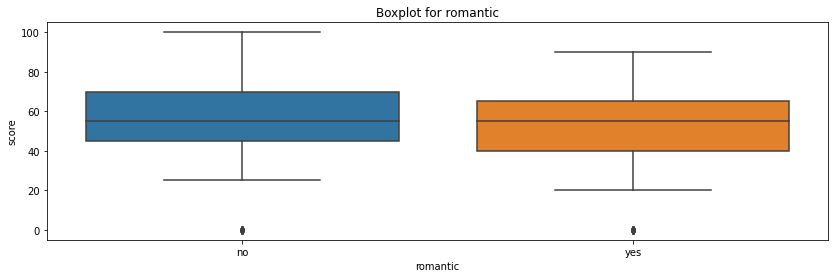

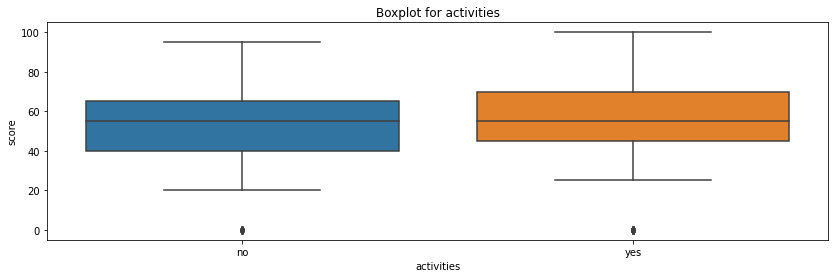

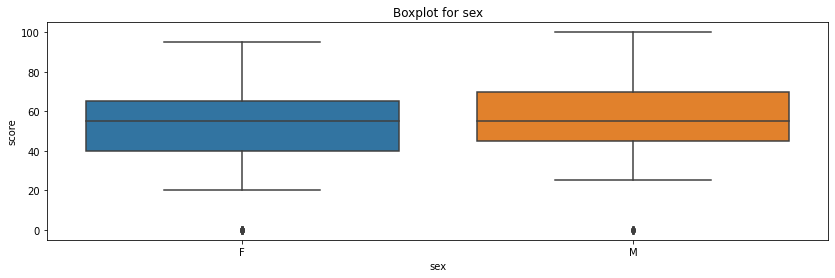

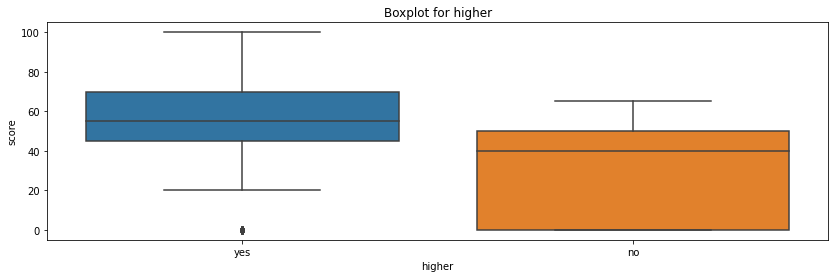

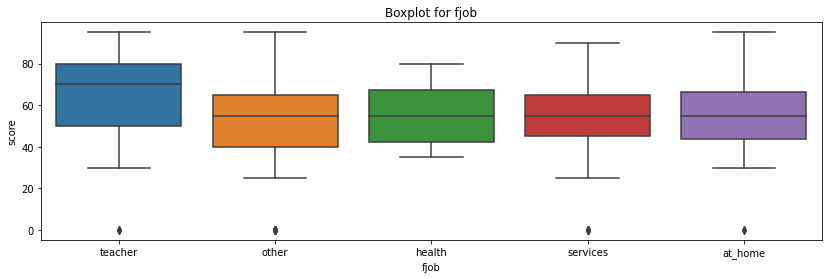

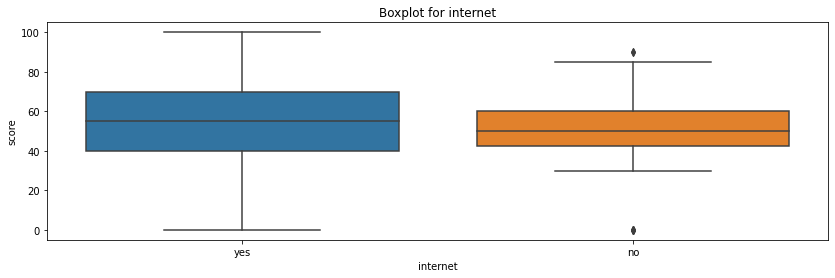

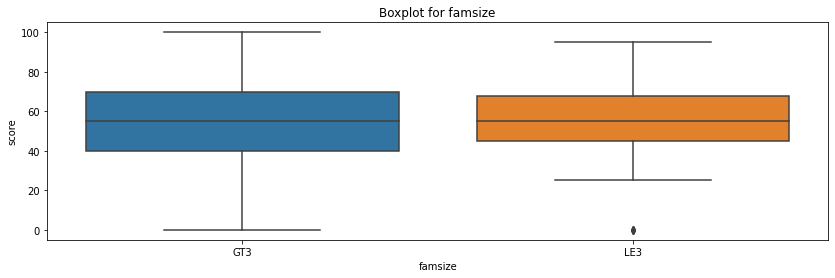

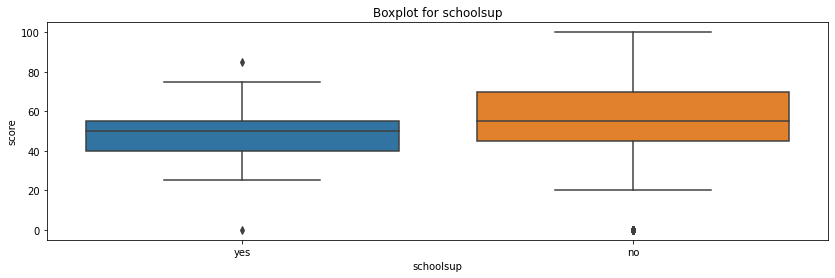

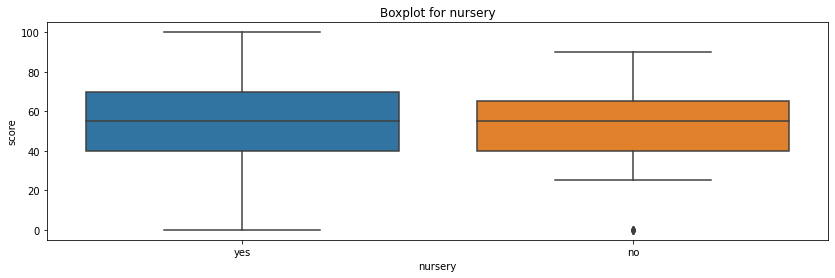

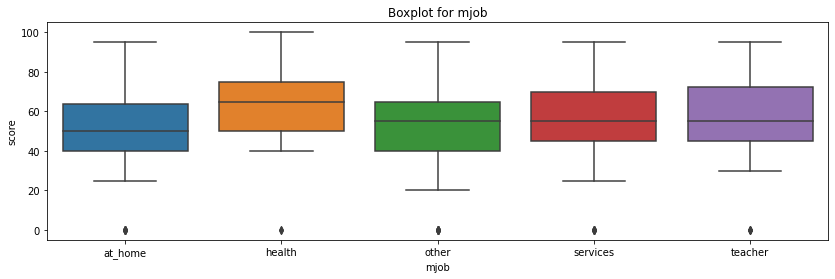

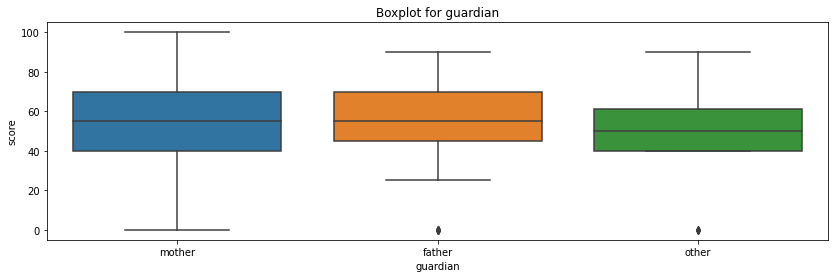

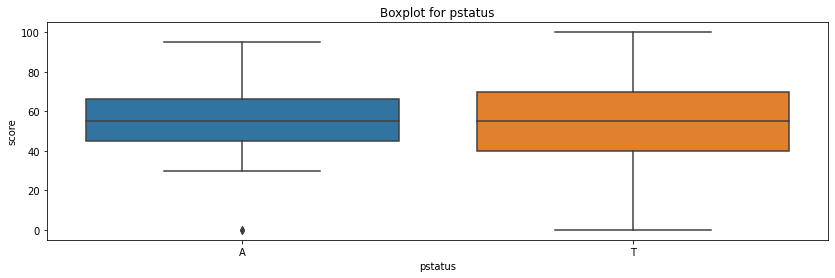

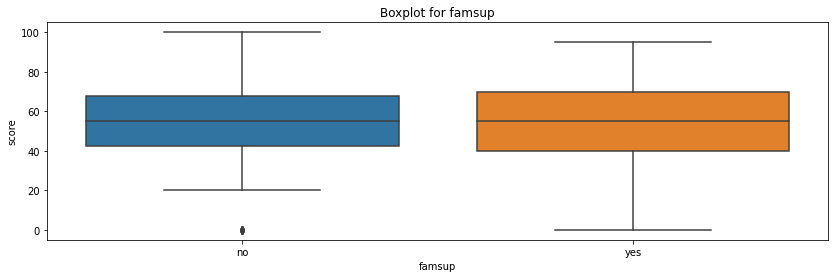

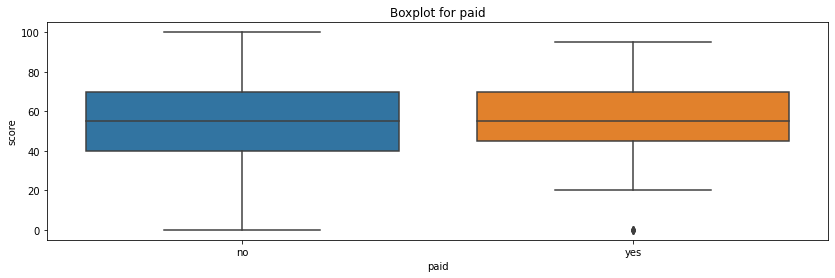

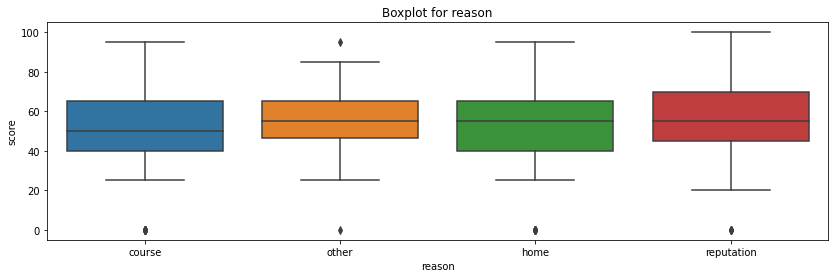

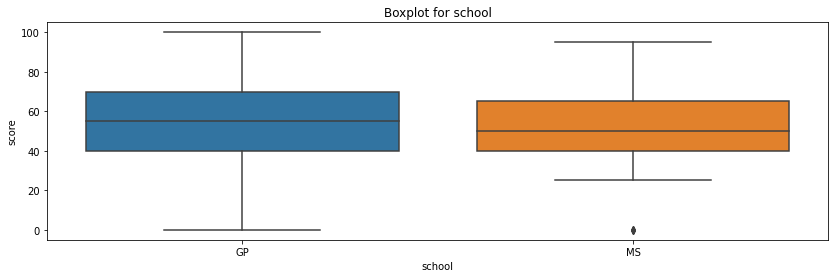

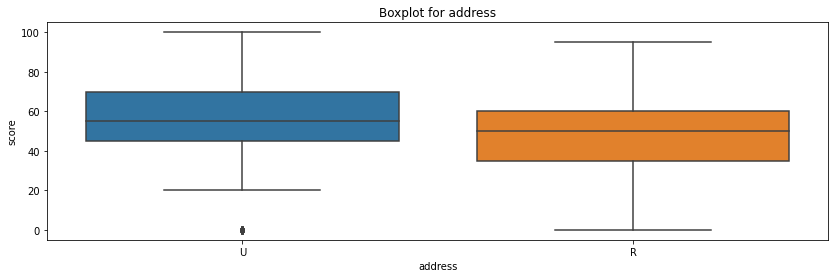

In [11]:
# Look at the object columns
for col in set(stud.columns) - set(numeric_columns):
    get_boxplot(col)

In [12]:
# Find statistically significant differences for the columns
for col in set(stud.columns) - set(numeric_columns):
    get_stat_dif(col)

Statistically significant differences were found for the mjob column


Выбросов в данных достаточно много, также имеются пропуски не более 8% в столбце, данные не очень чистые, доверие к полученным выводам будет меньше, чем у выводов в тренировочном блоке. 

Для дальнейшего рассмотрения в модели из номинативных колонок подходит только "mjob". Это значительно уменьшает количество рассматриваемых параметров, следовательно: 

1. Обучение модели быдет сделать легче, меньше параметров за которыми необходимо следить.

2. В дальнейшем проще собирать новые данные по ученикам, так как необходимо меньше информации. 


Стопроцентная корееляция между столбцами 'studytime_granular' и 'studytime' (обратная зависимость) говорит о том, что эти столбцы обозначают одно и тоже, из-за чего нет смысла оставлять оба столбца для дальнейшего рассмотрения. 


Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели это:
    
   * mjob
   * age
   * medu
   * fedu
   * traveltime
   * studytime
   * famrel
   * freetime
   * goout
   * health
   * absences
   * score   

In [13]:
stud.corr()['score']

age          -0.171707
medu          0.230728
fedu          0.140526
traveltime   -0.072792
studytime     0.112830
famrel        0.057692
freetime      0.000582
goout        -0.129685
health       -0.070460
absences      0.081274
score         1.000000
Name: score, dtype: float64

1. Самая большая корреляция наблюдается между образованием матери. Видимо это связанно с тем, что матери больше времени находятся с детьи и больше занимаются их воспитанием и образованием. 

2. Чем старше студент - тем хуже баллы на экзамене, возможно, это связанно с тем, что с взрослением меняются приоритеты, появляются другие интересы, а также нельзя забывать, что и математика усложняется и пробелы накапливаются как снежный ком. 

3. Интересно, что количевство свободного времени после школы ("freetime") критически слабо связанно с результатами на экзамене. Данный параметр можно убрать из рассмотрения.

4. Близкие значения studytime(11%) и goout (-13%) могут показывать, что если студент не проводит время с друзьями, то данное время он вероятно потратит на обучение. 



Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели это:

   * mjob
   * age
   * medu
   * fedu
   * traveltime
   * studytime
   * famrel
   * goout
   * health
   * absences
   * score 
   
Интересно, что если сложить абсолютные значения корреляции данных параметров и баллов на экзамене, то получается примерно 1.068, из-за чего можно сделать вывод о достаточности данных параметров для модели. 
Все вмести эти параметры дополняют друг друга и их достаточно для прогнозирования результатов учеников на экзамене. 

Необходимо расширить выборку, увеличить количество школ и повысить чистоту исходных данных.  